## Statistical relationships between peoples’ choice in music and their mental health

## Part 1 Initialization

In [1]:
# Import libraries
import numpy as np
import pandas as pd

# Our own libraies
from misc import prediction, analysis

In [2]:
# File name and file path
file_name = "mxmh_survey_results.csv"
file_dir = "./data/"

# Read file
df = pd.read_csv(file_dir+file_name)

## Part 2 Data Preprocessing

In [3]:
# Print info of original dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

**Our Analysis**
1. We can see there are 736 rows and 33 cols in total;
2. Most columnss are full or lack less than 5 slots;
3. Column "BPM" lack more than 100+ slots;
4. Columns like frequencies should be converted into integer format.

In [4]:
# General data cleaning
# Apply to both data analysis and prediction

# Drop unnecessary columns
df.drop(columns=["Timestamp", "Permissions"], inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Drop invalid rows 
# There is a guy whose BPM is 999999999 (one billion - 1)
df.drop(df[df["BPM"]>300].index, inplace=True)

# Choose certain columns to apply preprocessing
freq_cols = [col_name for col_name in df.columns if col_name.startswith("Frequency")]
symptom_cols = ["Anxiety", "Depression", "Insomnia", "OCD"]

# Convert frequency columns from str to int
freq2int_dict = {"Never":0, "Rarely":1, "Sometimes":2, "Very frequently":3}
for col_name in freq_cols:
    df[col_name] = df[col_name].map(freq2int_dict)

# Convert symptom columns from obejct to numeric
for col_name in symptom_cols:
    df[col_name] = pd.to_numeric(df[col_name], errors='coerce')

# Convert BPM column from object to numeric
df["BPM"] = pd.to_numeric(df["BPM"], errors='coerce')

In [5]:
# Print info of preprocessed dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 2 to 735
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           614 non-null    float64
 1   Primary streaming service     614 non-null    object 
 2   Hours per day                 614 non-null    float64
 3   While working                 614 non-null    object 
 4   Instrumentalist               614 non-null    object 
 5   Composer                      614 non-null    object 
 6   Fav genre                     614 non-null    object 
 7   Exploratory                   614 non-null    object 
 8   Foreign languages             614 non-null    object 
 9   BPM                           614 non-null    float64
 10  Frequency [Classical]         614 non-null    int64  
 11  Frequency [Country]           614 non-null    int64  
 12  Frequency [EDM]               614 non-null    int64  
 13  Frequency 

In [6]:
# Save cleaned data to a new file
'''
file_name_new = "mxmh_survey_results_cleaned.csv"
df.to_csv(file_dir+file_name_new, index=False)
'''

'\nfile_name_new = "mxmh_survey_results_cleaned.csv"\ndf.to_csv(file_dir+file_name_new, index=False)\n'

## Part 3 Data Analysis

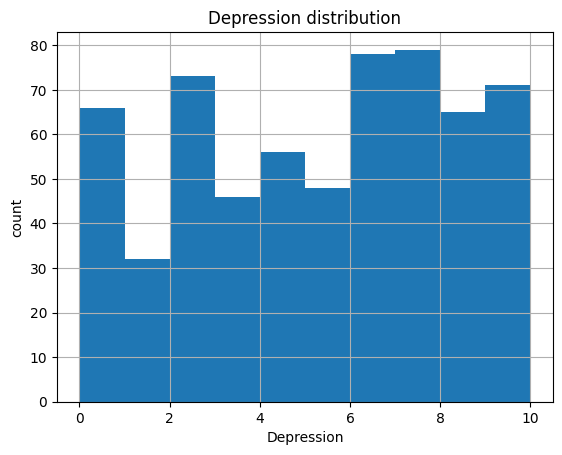

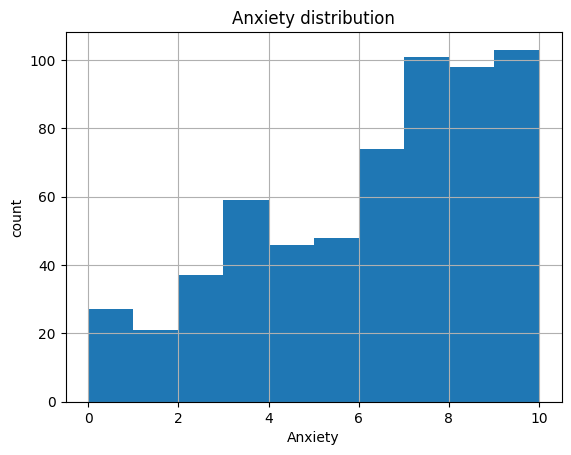

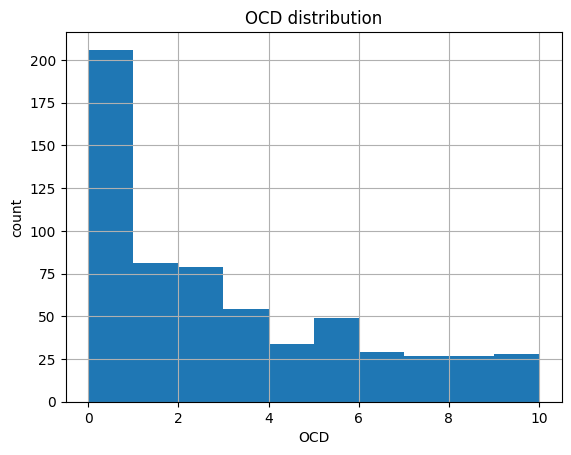

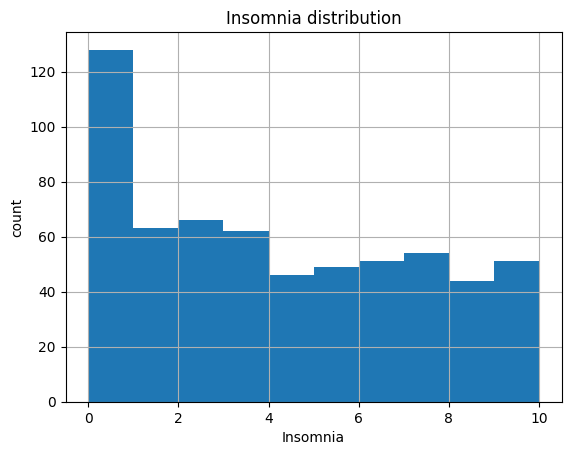

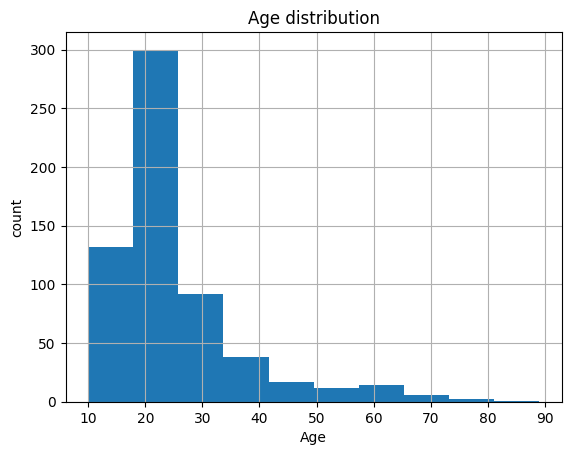

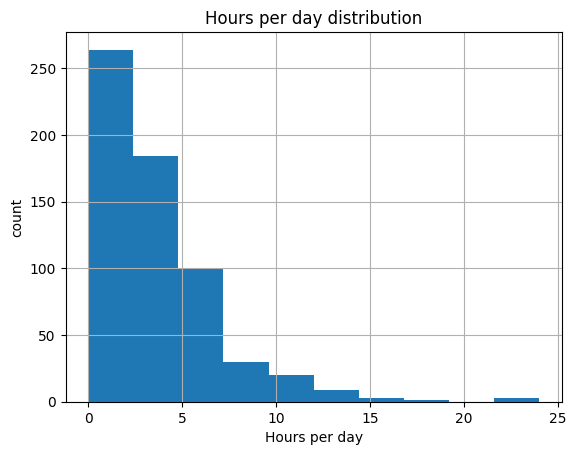

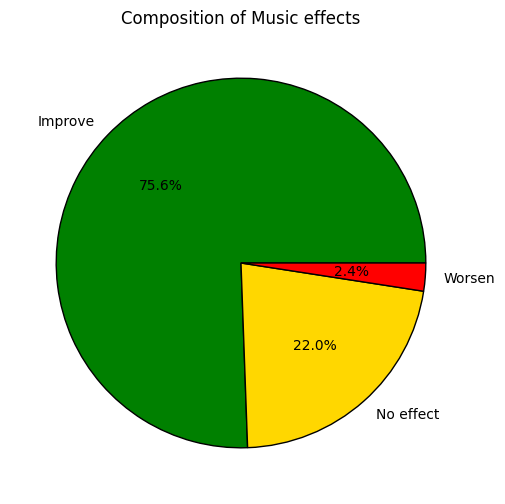

In [7]:
# Let's see value distribution of some columns
analysis.draw_hist(df, "Depression")
analysis.draw_hist(df, "Anxiety")
analysis.draw_hist(df, "OCD")
analysis.draw_hist(df, "Insomnia")
analysis.draw_hist(df, "Age")
analysis.draw_hist(df, "Hours per day")

# Music effect is a core column in our dataset
# Let's see music effects' components
analysis.draw_pie(df, "Music effects")

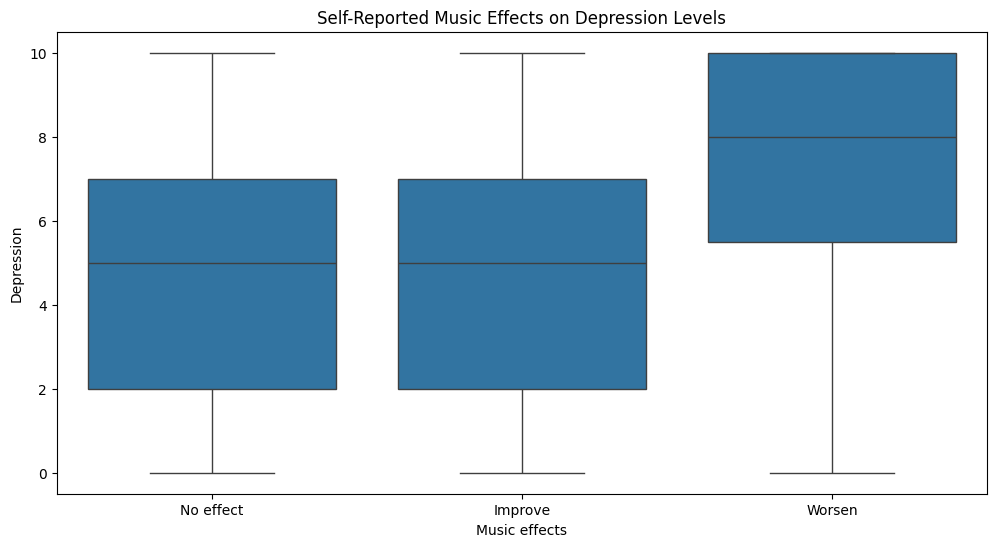

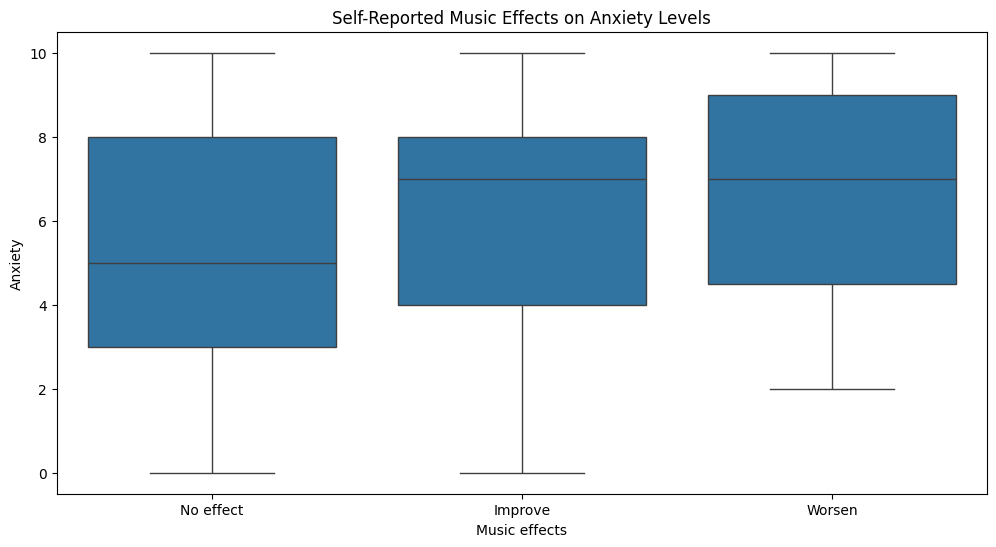

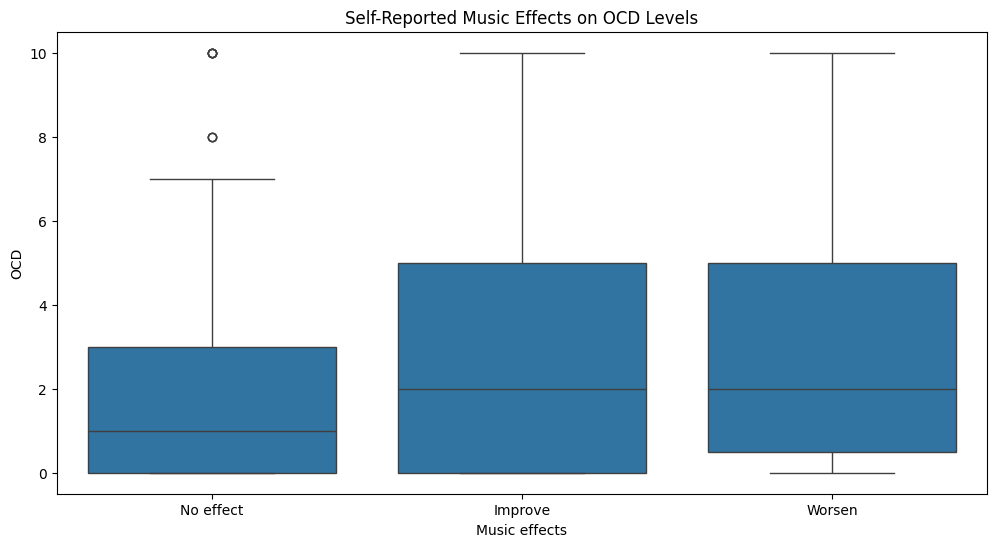

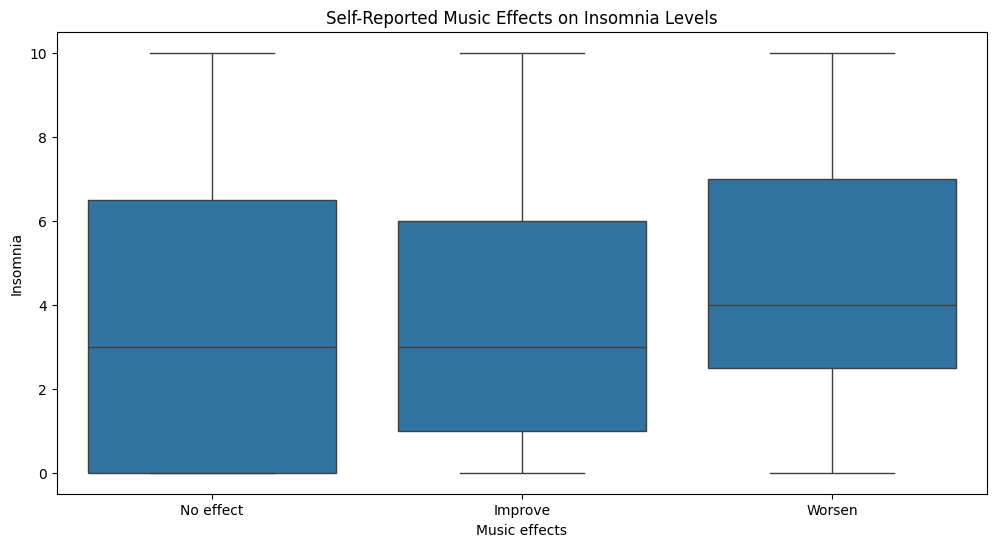

,Depression,Anxiety,Insomnia,OCD
Music effects,,,,
Improve,4.946121,6.132543,3.811422,2.771552
No effect,4.422222,4.970370,3.681481,2.207407
Worsen,7.200000,6.666667,4.466667,3.133333


In [8]:
# Show some statistical info between symptom levels and music effects
analysis.draw_box_effect_symptom(df, "Depression")
analysis.draw_box_effect_symptom(df, "Anxiety")
analysis.draw_box_effect_symptom(df, "OCD")
analysis.draw_box_effect_symptom(df, "Insomnia")
analysis.summary_effect_symptoms(df)

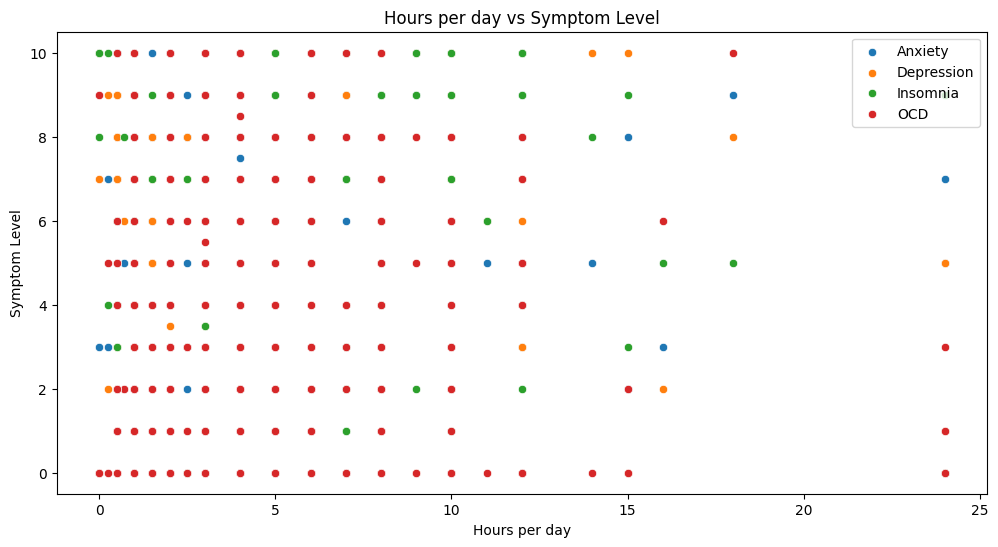

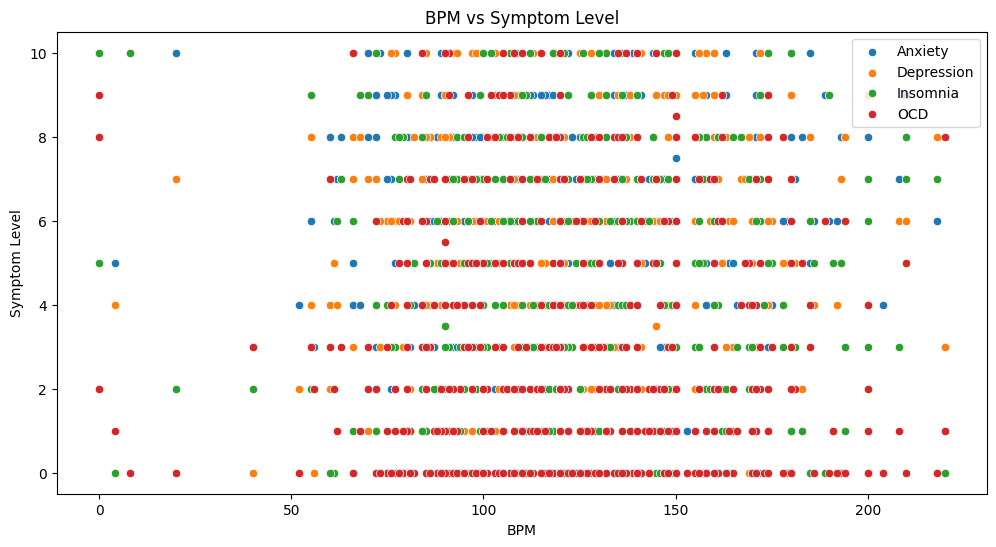

In [9]:
# We guess column "Hours per day" and "BPM" have relation with symptoms
analysis.draw_scatter_symptom_otherCol(df, "Hours per day")
analysis.draw_scatter_symptom_otherCol(df, "BPM")

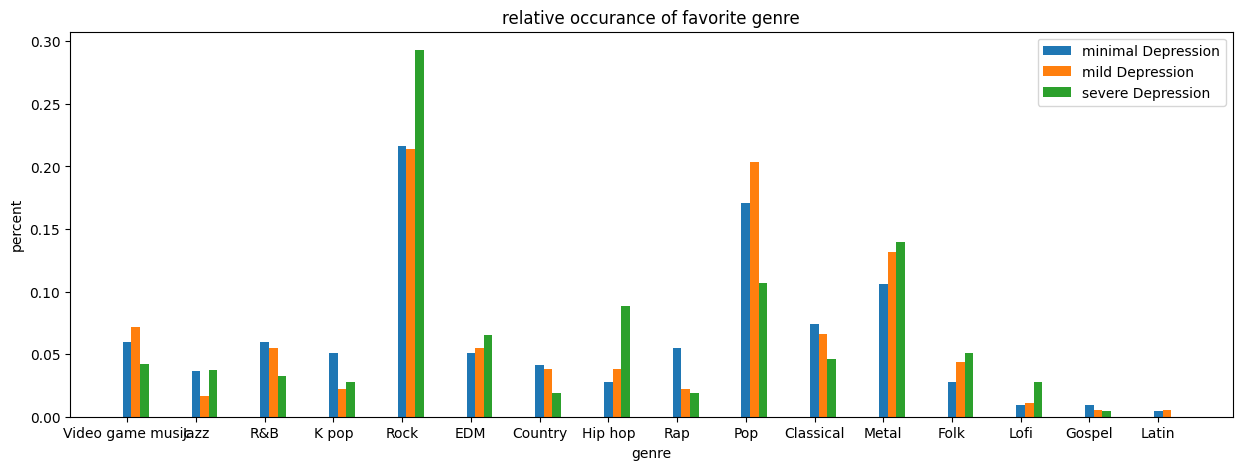

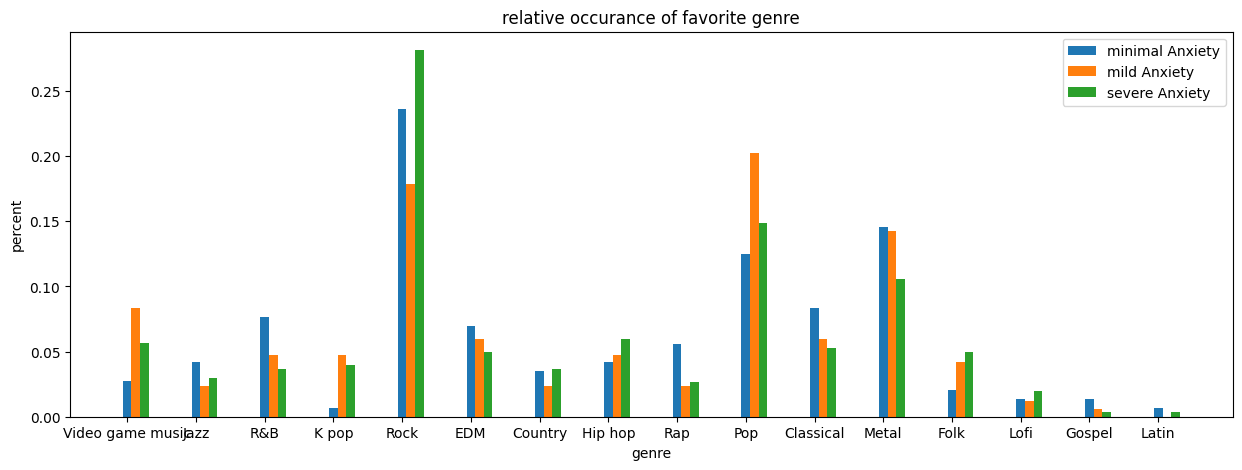

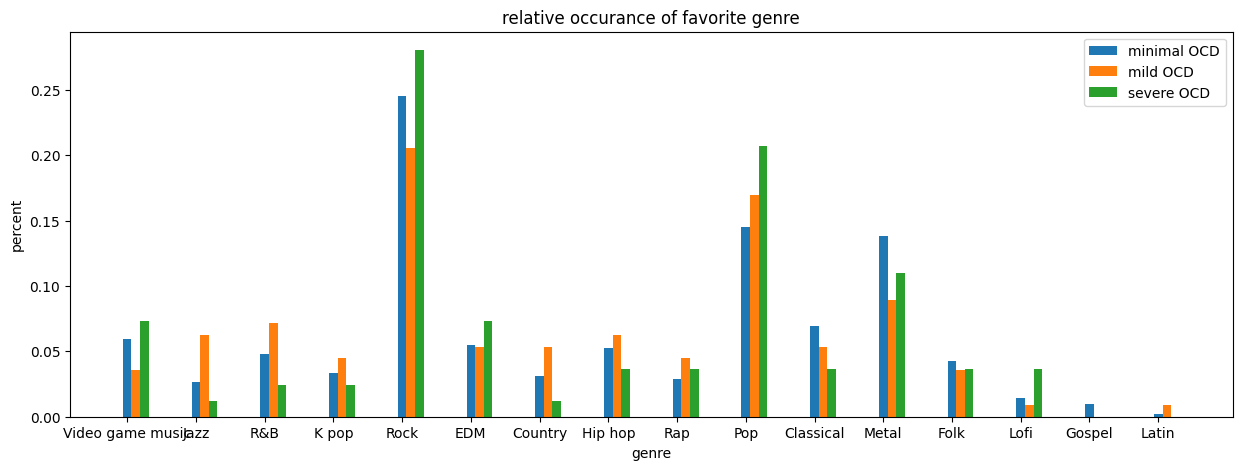

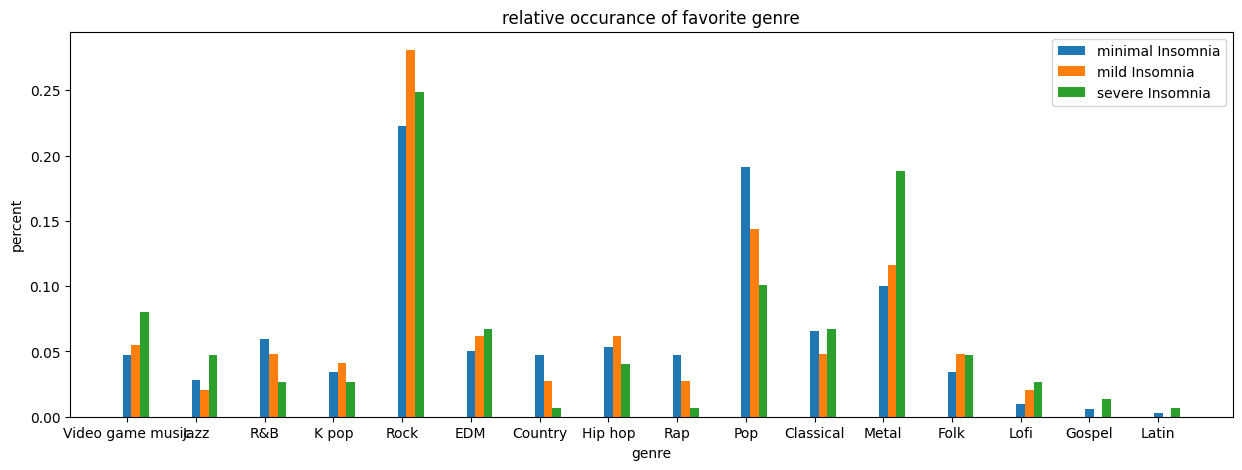

In [10]:
# We guess music genres have relation with symptoms
analysis.draw_multihist_genre_symptom(df, "Depression")
analysis.draw_multihist_genre_symptom(df, "Anxiety")
analysis.draw_multihist_genre_symptom(df, "OCD")
analysis.draw_multihist_genre_symptom(df, "Insomnia")

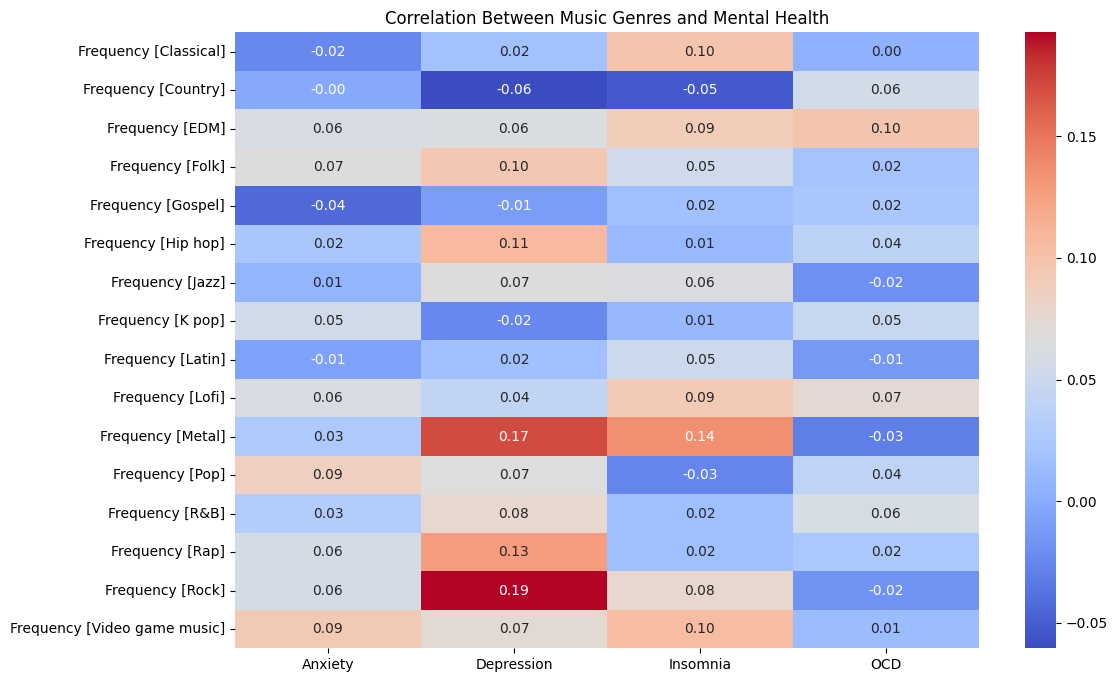

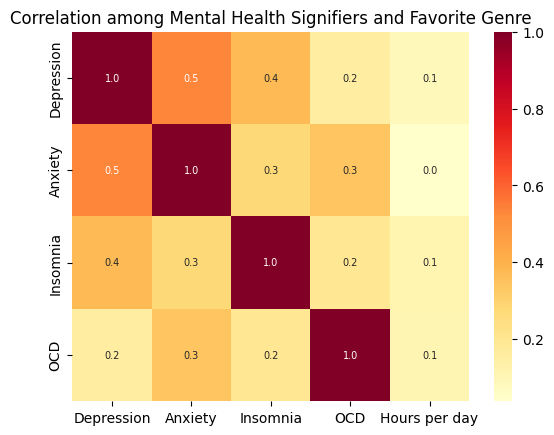

<Figure size 2000x1000 with 0 Axes>

In [11]:
# Show correlation in our dataset
# Fig1: correlation between symptoms and music genre
# Fig2: correlation between symptoms and genres
analysis.draw_correlation_symptom_genre(df)
analysis.draw_correlation_symptom_symptom(df)

## Part 4 Data Prediction

In [12]:
# Further data preprocessing for prediction

# Drop categorical columns
data = df.drop(columns=["Primary streaming service", "Fav genre"])

# Convert bool values to int
bool_cols = ["While working", "Instrumentalist", "Composer", "Exploratory", "Foreign languages"]
bool2int_dict = {"No":0, "Yes":1}
for col_name in bool_cols:
    data[col_name] = data[col_name].map(bool2int_dict)

# Convert "Music effects" to int
effect2int_dict = {"Worsen":0, "No effect":1, "Improve":2}
data["Music effects"] = data["Music effects"].map(effect2int_dict)

In [13]:
# Extract features and label from data

# Convert data into numpy array
data = data.values

# Shuffle data
np.random.seed(1)
np.random.shuffle(data)

# Split x(input) and y(output)
# The last 5 cols are y
x, y = data[:, :-5], data[:, -5:]

# Unify data type
x = x.astype(np.float32)
y = y.astype(np.int32)

# Split train set and test set
train_ratio = 0.8 # You may change the ratio
threshold = int(train_ratio * len(x))
x_train, y_train = x[:threshold, :], y[:threshold, :]
x_test,  y_test  = x[threshold:, :], y[threshold:, :]

# Feature scaling with Z-score
train_mean, train_std = np.mean(x_train, axis=0), np.std(x_train, axis=0)
x_train = (x_train - train_mean) / train_std
x_test  = (x_test  - train_mean) / train_std

In [14]:
# Record performance of each model
models_MSE = {}
models_ACC = {}

MSE loss on Anxiety   : 7.1422               	Accuracy on Anxiety   : 15.45%.
MSE loss on Depression: 8.9655               	Accuracy on Depression: 9.76%.
MSE loss on Insomnia  : 9.4111               	Accuracy on Insomnia  : 5.69%.
MSE loss on OCD       : 5.9704               	Accuracy on OCD       : 19.51%.
MSE loss on Effect    : 0.2762               	Accuracy on Effect    : 71.54%.


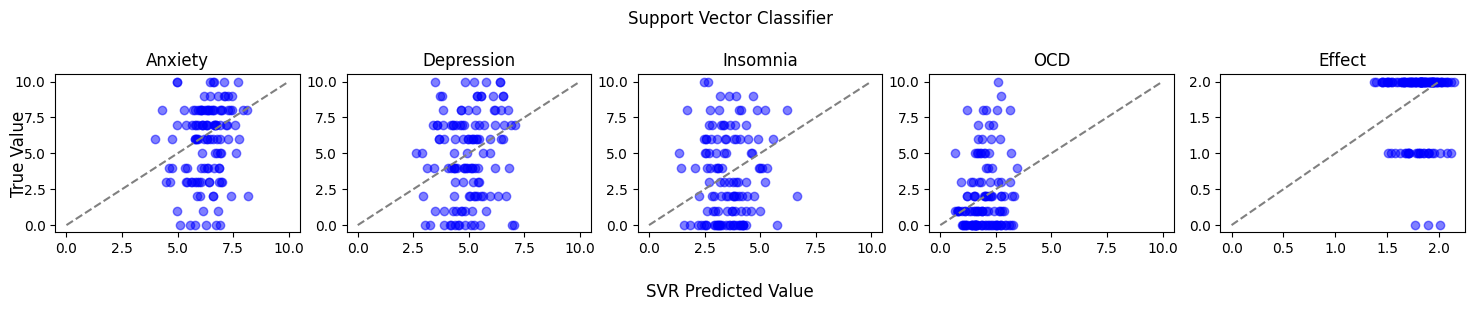

In [15]:
# Support vector regressor wtih Gaussian kernel
y_pred = prediction.stats_model("SVR", x_train, x_test, y_train, y_test)
models_MSE["SVR"], models_ACC["SVR"] = prediction.model_metric("SVR", y_test, y_pred)
prediction.draw_scatter_model("SVR", y_test, y_pred)

MSE loss on Anxiety   : 10.0569               	Accuracy on Anxiety   : 17.07%.
MSE loss on Depression: 14.7724               	Accuracy on Depression: 9.76%.
MSE loss on Insomnia  : 18.4715               	Accuracy on Insomnia  : 22.76%.
MSE loss on OCD       : 10.4390               	Accuracy on OCD       : 34.96%.
MSE loss on Effect    : 0.3008               	Accuracy on Effect    : 77.24%.


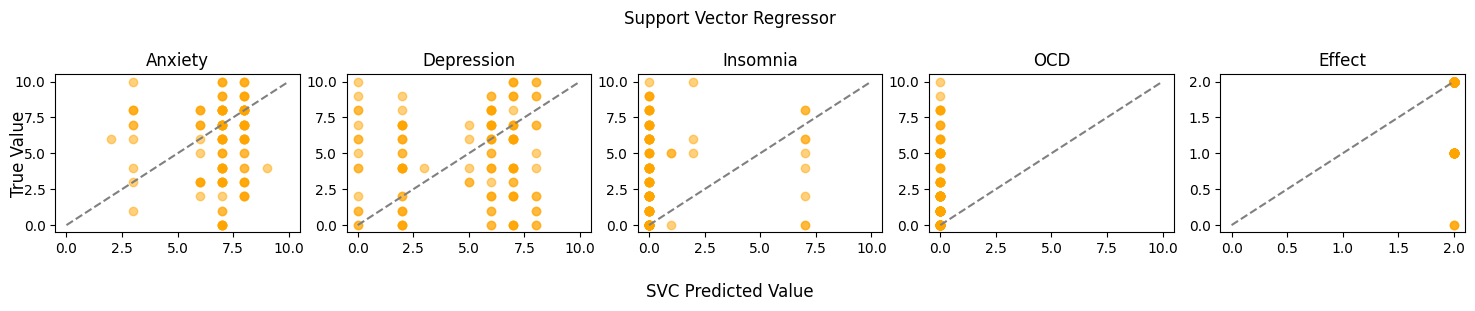

In [16]:
# Support vector classifier wtih Gaussian kernel
y_pred = prediction.stats_model("SVC", x_train, x_test, y_train, y_test)
models_MSE["SVC"], models_ACC["SVC"] = prediction.model_metric("SVC", y_test, y_pred)
prediction.draw_scatter_model("SVC", y_test, y_pred)

MSE loss on Anxiety   : 10.7480               	Accuracy on Anxiety   : 13.82%.
MSE loss on Depression: 13.7724               	Accuracy on Depression: 11.38%.
MSE loss on Insomnia  : 18.4309               	Accuracy on Insomnia  : 16.26%.
MSE loss on OCD       : 9.7236               	Accuracy on OCD       : 34.15%.
MSE loss on Effect    : 0.3008               	Accuracy on Effect    : 77.24%.


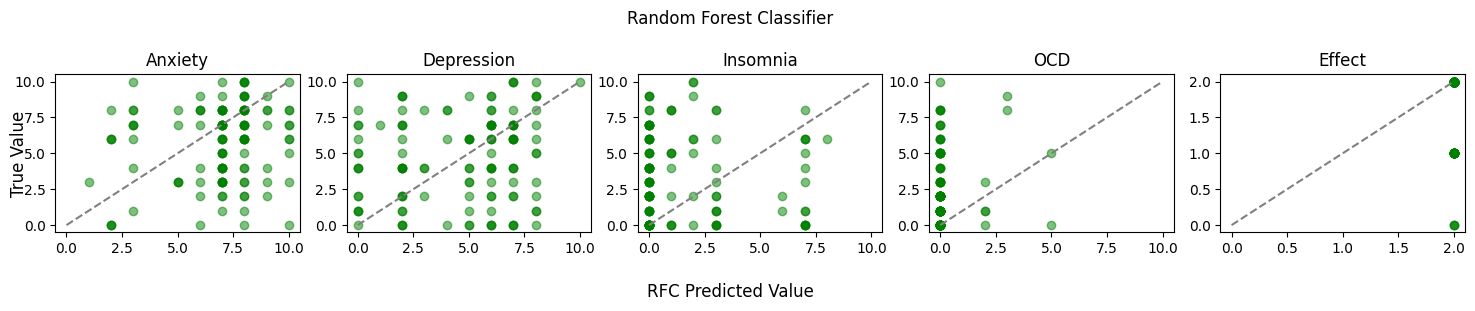

In [17]:
# Random forest classifier
y_pred = prediction.stats_model("RFC", x_train, x_test, y_train, y_test)
models_MSE["RFC"], models_ACC["RFC"] = prediction.model_metric("RFC", y_test, y_pred)
prediction.draw_scatter_model("RFC", y_test, y_pred)

MSE loss on Anxiety   : 13.2602               	Accuracy on Anxiety   : 16.26%.
MSE loss on Depression: 19.8374               	Accuracy on Depression: 14.63%.
MSE loss on Insomnia  : 21.1545               	Accuracy on Insomnia  : 7.32%.
MSE loss on OCD       : 23.2033               	Accuracy on OCD       : 13.01%.
MSE loss on Effect    : 0.4390               	Accuracy on Effect    : 63.41%.


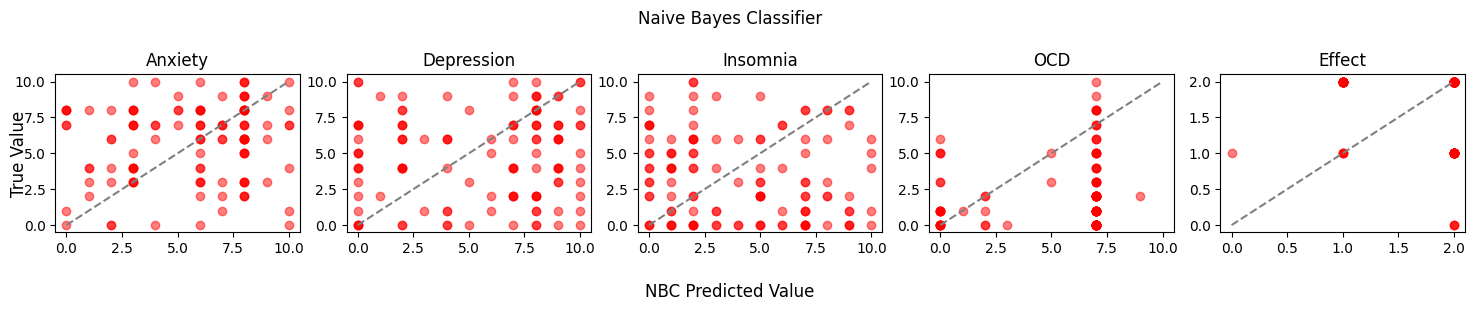

In [18]:
# Naive Bayes classifier
y_pred = prediction.stats_model("NBC", x_train, x_test, y_train, y_test)
models_MSE["NBC"], models_ACC["NBC"] = prediction.model_metric("NBC", y_test, y_pred)
prediction.draw_scatter_model("NBC", y_test, y_pred)

MSE loss on Anxiety   : 11.7317               	Accuracy on Anxiety   : 19.51%.
MSE loss on Depression: 17.0976               	Accuracy on Depression: 9.76%.
MSE loss on Insomnia  : 20.0488               	Accuracy on Insomnia  : 25.20%.
MSE loss on OCD       : 10.4390               	Accuracy on OCD       : 34.96%.
MSE loss on Effect    : 0.3008               	Accuracy on Effect    : 77.24%.


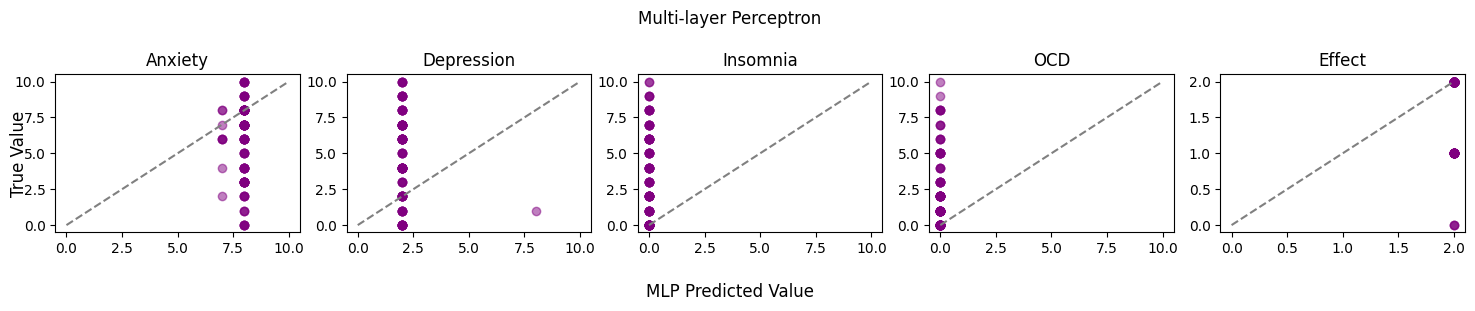

In [19]:
# Multi-layer perceptron
y_pred = prediction.nn_model("MLP", x_train, x_test, y_train, y_test)
models_MSE["MLP"], models_ACC["MLP"] = prediction.model_metric("MLP", y_test, y_pred)
prediction.draw_scatter_model("MLP", y_test, y_pred)

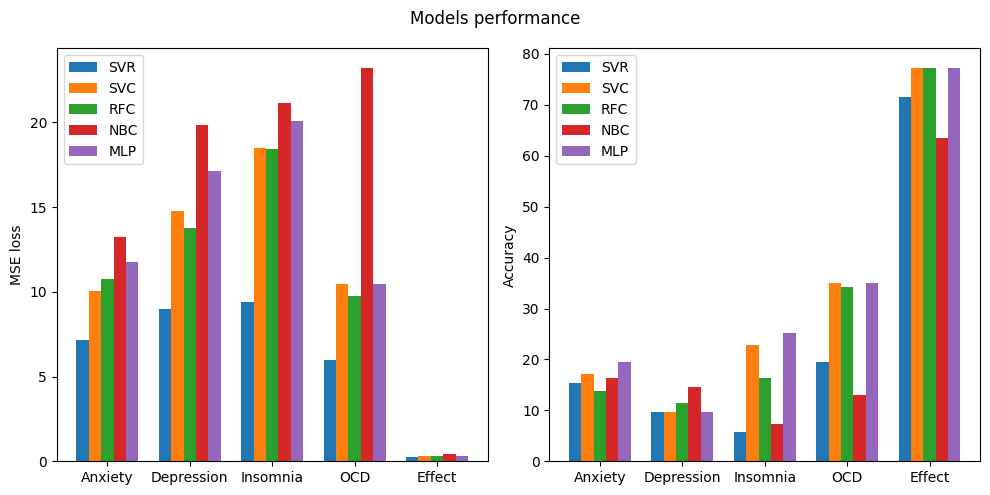

In [20]:
# Compare models performance
prediction.draw_multihist_model(models_MSE, models_ACC)